In [22]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [23]:
df = pd.read_csv('/Users/db/Desktop/Indian Tech Startup ML/GitHub Notebooks/12345.csv')

/var/folders/h3/b9cjql916vq83y97m2p8lv9m0000gn/T/ipykernel_5623/1188282253.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/db/Desktop/Indian Tech Startup ML/GitHub Notebooks/12345.csv')


In [24]:
df_model = df.select_dtypes(exclude='object') ## Fills 0's for the only empty cells in the feature encoded columns
df_model = df_model.fillna(0)                 ## The feature encoded investors are one-hot encoded

In [26]:
train,test=train_test_split(df_model,test_size=0.3,random_state=0,stratify=df_model['success'])
train_X=train.drop(columns='success', axis = -1)
train_Y=train['success']
test_X=test.drop(columns='success', axis = -1)
test_Y=test['success']

The accuracy of the Random Forest Classifier is 0.8357400722021661


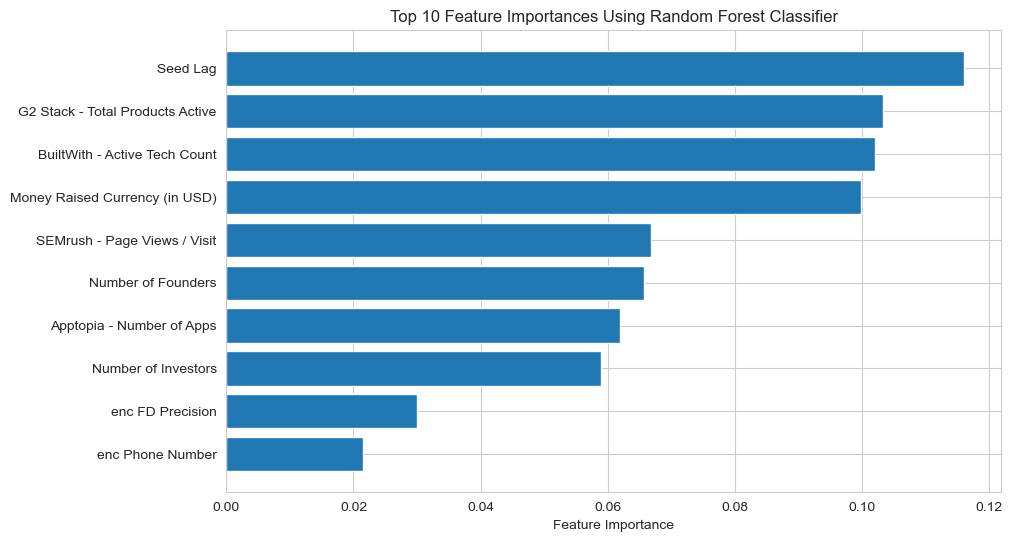

In [28]:
from sklearn.ensemble import RandomForestClassifier
feature_names = [f"feature {i}" for i in range(train_X.shape[1])]
modelRFC = RandomForestClassifier(random_state=5)
modelRFC.fit(train_X, train_Y)
pred = modelRFC.predict(test_X)
print('The accuracy of the Random Forest Classifier is',metrics.accuracy_score(pred,test_Y))

def plot_randomForest_feature_importances(model, X, top_n=10, figsize=(10, 6)):

    if not hasattr(model, 'feature_importances_'):
        raise AttributeError("The model does not have the attribute 'feature_importances_'.")

    # Get feature importances from the model
    importances = model.feature_importances_

    # Get indices of the top_n importances
    indices = np.argsort(importances)[-top_n:]

    # Get feature names from the indices
    feature_names = X.columns if hasattr(X, 'columns') else np.arange(X.shape[1])

    # Plotting
    plt.figure(figsize=figsize)
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Feature Importances Using Random Forest Classifier')
    plt.show()
plot_randomForest_feature_importances(modelRFC, train_X)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 209, number of negative: 1081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 1290, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162016 -> initscore=-1.643308
[LightGBM] [Info] Start training from score -1.643308


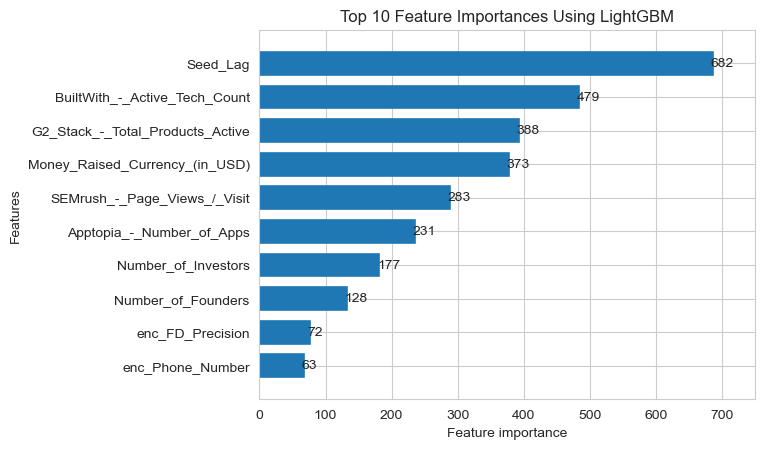

In [29]:
def plot_lgbm_feature_importances(model, X, top_n=10, figsize=(10, 6), importance_type='gain'):

    indices = np.argsort(importances)[-top_n:]

    # Get feature names from the indices
    feature_names = X.columns if hasattr(X, 'columns') else np.arange(X.shape[1])

    # Plotting
    plt.figure(figsize=figsize)
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Feature Importances ({importance_type})')
    plt.show()

import lightgbm as lgb
modelLGBC = lgb.LGBMClassifier()
modelLGBC.fit(train_X,train_Y)
ax = lgb.plot_importance(modelLGBC, height=0.5, max_num_features=10,linewidth=5.5)

# Loop through the bars and set the color
for bar in ax.patches:
    bar.set_color('C0')  # Replace 'your_color_choice' with your color. For example, 'blue', 'green', etc.
plt.title("Top 10 Feature Importances Using LightGBM")
plt.show()


The accuracy of the CatBoost Classifier is 0.8158844765342961


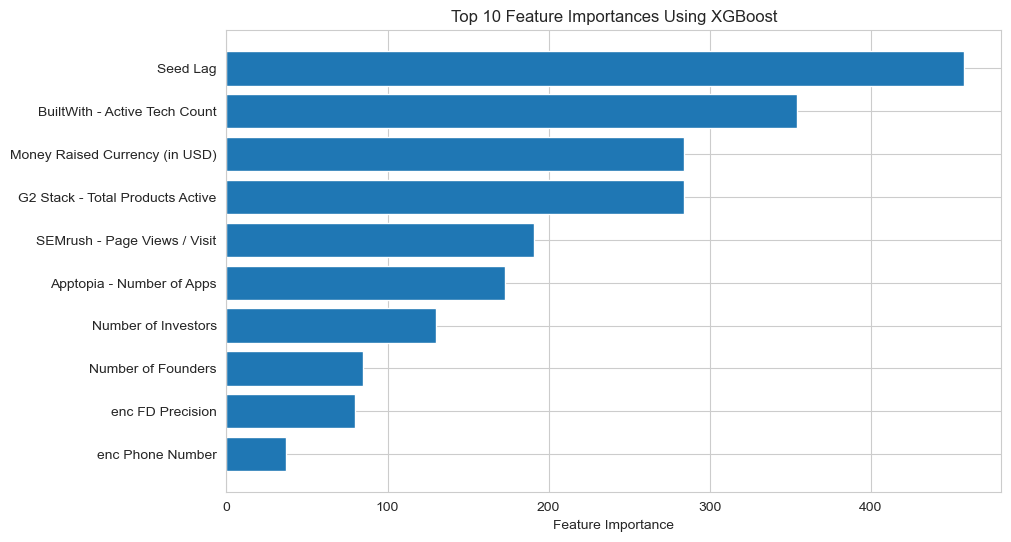

In [31]:
modelXGB = XGBClassifier(random_state=5)
modelXGB.fit(train_X, train_Y)
pred = modelXGB.predict(test_X)
print('The accuracy of the CatBoost Classifier is', metrics.accuracy_score(pred, test_Y))

def plot_xgboost_feature_importances(model, X, top_n=10, figsize=(10, 6), importance_type='weight'):
    
    importances = model.get_booster().get_score(importance_type=importance_type)
    sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=False)
    top_features = dict(sorted_importances[-top_n:])
    feature_names, scores = zip(*top_features.items())

    plt.figure(figsize=figsize)
    ax.set_facecolor("yellow")
    plt.barh(range(top_n), scores, align='center') 
    plt.yticks(range(top_n), feature_names) 
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Feature Importances Using XGBoost')
    plt.show()
plot_xgboost_feature_importances(modelXGB, train_X)

Learning rate set to 0.011486
0:	learn: 0.6854080	total: 3.69ms	remaining: 3.68s
1:	learn: 0.6789254	total: 4.47ms	remaining: 2.23s
2:	learn: 0.6724240	total: 5.25ms	remaining: 1.74s
3:	learn: 0.6663964	total: 6.12ms	remaining: 1.52s
4:	learn: 0.6601513	total: 7.13ms	remaining: 1.42s
5:	learn: 0.6530071	total: 7.97ms	remaining: 1.32s
6:	learn: 0.6463649	total: 8.7ms	remaining: 1.23s
7:	learn: 0.6399054	total: 9.45ms	remaining: 1.17s
8:	learn: 0.6342799	total: 10.2ms	remaining: 1.12s
9:	learn: 0.6288872	total: 10.9ms	remaining: 1.08s
10:	learn: 0.6237756	total: 11.6ms	remaining: 1.04s
11:	learn: 0.6182054	total: 12.3ms	remaining: 1.02s
12:	learn: 0.6123238	total: 13.1ms	remaining: 998ms
13:	learn: 0.6074700	total: 13.8ms	remaining: 973ms
14:	learn: 0.6014147	total: 14.5ms	remaining: 951ms
15:	learn: 0.5967559	total: 15.2ms	remaining: 933ms
16:	learn: 0.5914794	total: 15.8ms	remaining: 916ms
17:	learn: 0.5862334	total: 16.5ms	remaining: 900ms
18:	learn: 0.5816086	total: 17.2ms	remaining:

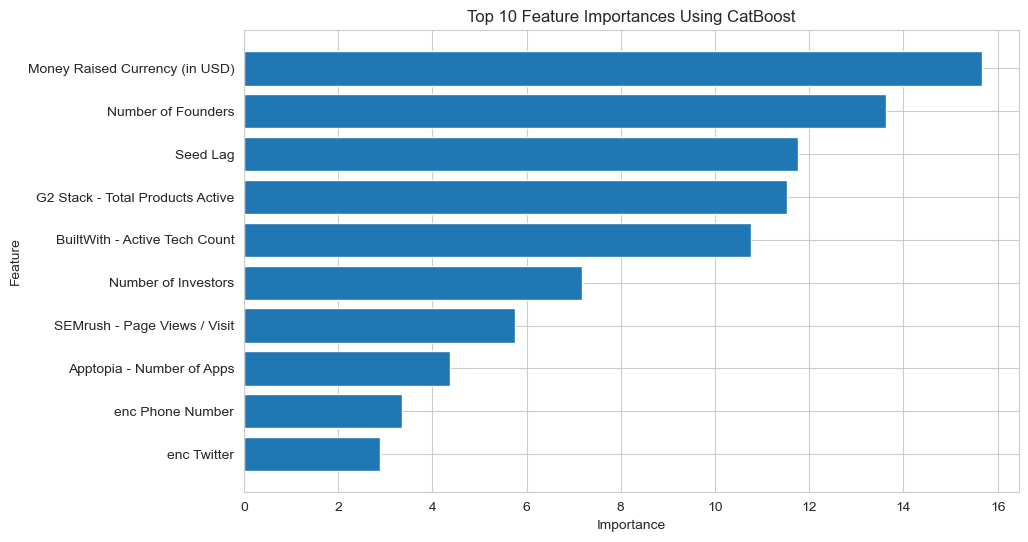

In [64]:
from catboost import CatBoostClassifier
from sklearn import metrics

model_catboost = CatBoostClassifier(random_state=5)
model_catboost.fit(train_X, train_Y)
pred_catboost = model_catboost.predict(test_X)
print('The accuracy of the CatBoost Classifier is', metrics.accuracy_score(pred_catboost, test_Y))

feature_importance = model_catboost.get_feature_importance()
feature_names = train_X.columns  

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]


top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance[sorted_idx[:top_n]][::-1], align="center")
plt.yticks(range(top_n), feature_names[sorted_idx[:top_n]][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances Using CatBoost")
plt.show()